In [2]:
!pip install pint
!pip install uncertainties
!pip install scipy
!pip install numpy
!pip install sympy
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 887.2 kB/s eta 0:00:00


In [3]:
from uncertainties import ufloat
from scipy import constants
import pint
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

ureg = pint.UnitRegistry()

# Exercises

In [4]:
# 3.1
x_0 = np.array([1.5, 2.9])
x_1 = np.array([5.9, -0.6])
v = (x_1 - x_0) / (3.0 - 0)
# print(v)
print('(a) The x-component of the average velocity is', f"{v[0]:.2g}", 'm/s, and y-component is', f"{v[1]:.2g}", 'm/s.')
print('(b) The magnitude of the average velocity is', f"{np.linalg.norm(v):.2g}", 'm/s, and direction is', f"{np.arctan2(v[1], v[0])*(180/np.pi):.2g}", 'degrees.')

(a) The x-component of the average velocity is 1.5 m/s, and y-component is -1.2 m/s.
(b) The magnitude of the average velocity is 1.9 m/s, and direction is -39 degrees.


(a) The average velocity between t=0 and t=2s is [5.6, 5.5] cm/s.
Its magnitude is 7.8 m/s, direction is 44 degrees.
(b) The magnitude of v_0 is 5.5 cm/s, and its direction is 90 degrees.
    The magnitude of v_1 is 7.8 cm/s, and its direction is 44 degrees.
    The magnitude of v_2 is 12 cm/s, and its direction is 26 degrees.


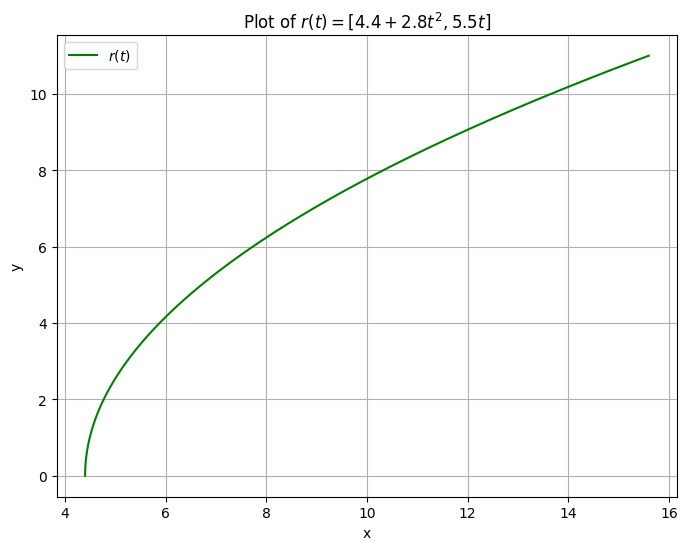

In [5]:
# 3.3 CALC
t = sp.symbols('t ')
r = sp.Matrix([4.4 + 2.8 * t**2, 5.5 * t])
v_av = (r.subs(t, 2) - r.subs(t, 0)) / 2
print('(a) The average velocity between t=0 and t=2s is', f"[{v_av[0]:.2g}, {v_av[1]:.2g}] cm/s.")
print(f"Its magnitude is {float(v_av.norm()):.2g} m/s, direction is {float(sp.atan2(v_av[1],v_av[0])*(180/np.pi)):.2g} degrees.")

v = r.diff(t)
v_0 = v.subs(t, 0)
v_1 = v.subs(t, 1)
v_2 = v.subs(t, 2)
print(f"(b) The magnitude of v_0 is {float(v_0.norm()):.2g} cm/s, and its direction is {float(sp.atan2(v_0[1],v_0[0])*(180/np.pi)):.2g} degrees.")
print(f"    The magnitude of v_1 is {float(v_1.norm()):.2g} cm/s, and its direction is {float(sp.atan2(v_1[1],v_1[0])*(180/np.pi)):.2g} degrees.")
print(f"    The magnitude of v_2 is {float(v_2.norm()):.2g} cm/s, and its direction is {float(sp.atan2(v_2[1],v_2[0])*(180/np.pi)):.2g} degrees.")

r_func = sp.lambdify(t, r, 'numpy')
t_values = np.linspace(0, 2, 400)
r_values = r_func(t_values)


# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(r_values[0][0], r_values[1][0] ,label='$r(t)$', color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $r(t) = [4.4 + 2.8 t^2, 5.5 t]$')
plt.grid(True)
plt.legend()
plt.show()


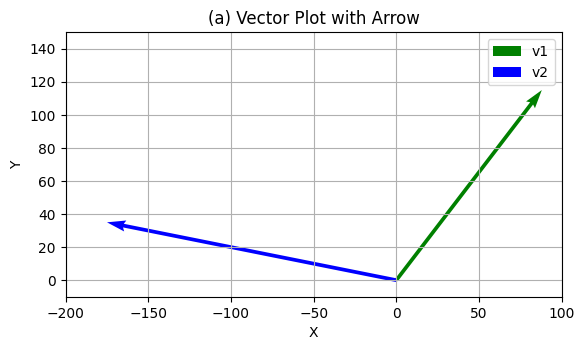

(b) The x-component of the average acceleration is -8.77 m/s^2, y-component is -2.67 m/s^2.
(c) The magnitude of the average acceleration is 9.16 m/s^2, direction is -163 degrees.


In [6]:
# 3.5 ???
v_1 = sp.Matrix([88, 115])
v_2 = sp.Matrix([-175, 35])

# 将向量转换为 numpy 数组
v_1_np = np.array(v_1, dtype=float)
v_2_np = np.array(v_2, dtype=float)

# 创建图形和坐标轴
fig, ax = plt.subplots()

# 绘制向量
ax.quiver(0, 0, v_1_np[0], v_1_np[1], angles='xy', scale_units='xy', scale=1, color='g', label='v1')
ax.quiver(0, 0, v_2_np[0], v_2_np[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')

# 设置坐标轴的比例
ax.set_aspect('equal')

# 设置坐标轴范围
ax.set_xlim(-200, 100)
ax.set_ylim(-10, 150)

# 添加网格
ax.grid(True)

# 添加标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('(a) Vector Plot with Arrow')

plt.legend()
plt.show()

a = (v_2 - v_1) / 30.0
# print(a)
print(f"(b) The x-component of the average acceleration is {float(a[0]):.3g} m/s^2, y-component is {float(a[1]):.3g} m/s^2.")
print(f"(c) The magnitude of the average acceleration is {float(a.norm()):.3g} m/s^2, direction is {float(sp.atan2(a[1],a[0])*(180/np.pi)):.3g} degrees.")

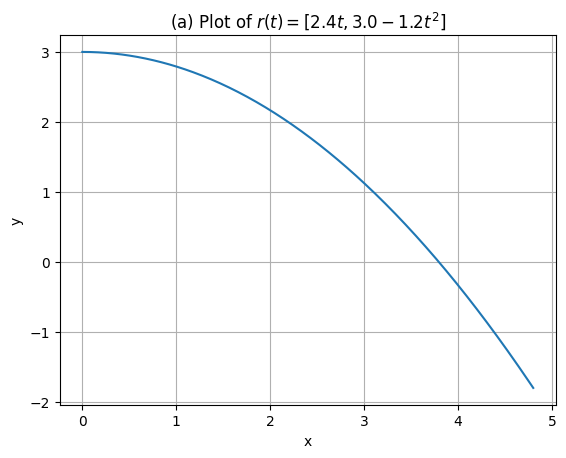

(b) v(t) = [2.40000000000000, -2.4*t] m/s, and a(t) = [0, -2.40000000000000] m/s^2.
(c) At t=2.0s, the magnitude of the bird's velocity is 5.4 m/s, its direction is -63 degrees.
    The magnitude of the bird's acceleration is 2.4 m/s^2, its direction is -90 degrees.


In [7]:
# 3.7 CALC
t = sp.symbols('t ')
x = 2.4 * t
y = 3.0 - 1.2 * t**2
r = sp.Matrix([x, y])

r_func = sp.lambdify(t, r, 'numpy')
t_values = np.linspace(0, 2, 400)
r_values = r_func(t_values)

plt.plot(r_values[0][0], r_values[1][0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('(a) Plot of $r(t) = [2.4 t, 3.0 - 1.2 t^2]$')
plt.grid(True)
plt.show()

v = r.diff(t)
a = v.diff(t)
print(f"(b) v(t) = {[v[0],v[1]]} m/s, and a(t) = {[a[0],a[1]]} m/s^2.")

print(f"(c) At t=2.0s, the magnitude of the bird's velocity is {float(v.subs(t,2.0).norm()):.2g} m/s, its direction is {float(sp.atan2(v.subs(t,2)[1],v.subs(t,2)[0])*(180/np.pi)):.2g} degrees.")
print(f"    The magnitude of the bird's acceleration is {float(a.subs(t,2.0).norm()):.2g} m/s^2, its direction is {float(sp.atan2(a.subs(t,2)[1],a.subs(t,2)[0])*(180/np.pi)):.2g} degrees.")

(a) The height of the tabletop above the floor is 0.502 m.
(b) The horizontal distance from the edge of the table is 0.448 m.
(c) The x-component of the velocity is 1.4 m/s, and y-component is -3.14 m/s.
    The magnitude of the velocity is 3.43 m/s, and its acceleration is -66 degrees.
(d) lambdify不能处理常数函数，所以我在变量v添加了一个0.00001 * t，导致vx的图像不是水平的，但注意到y轴的单位是：1.4*10^(-6)


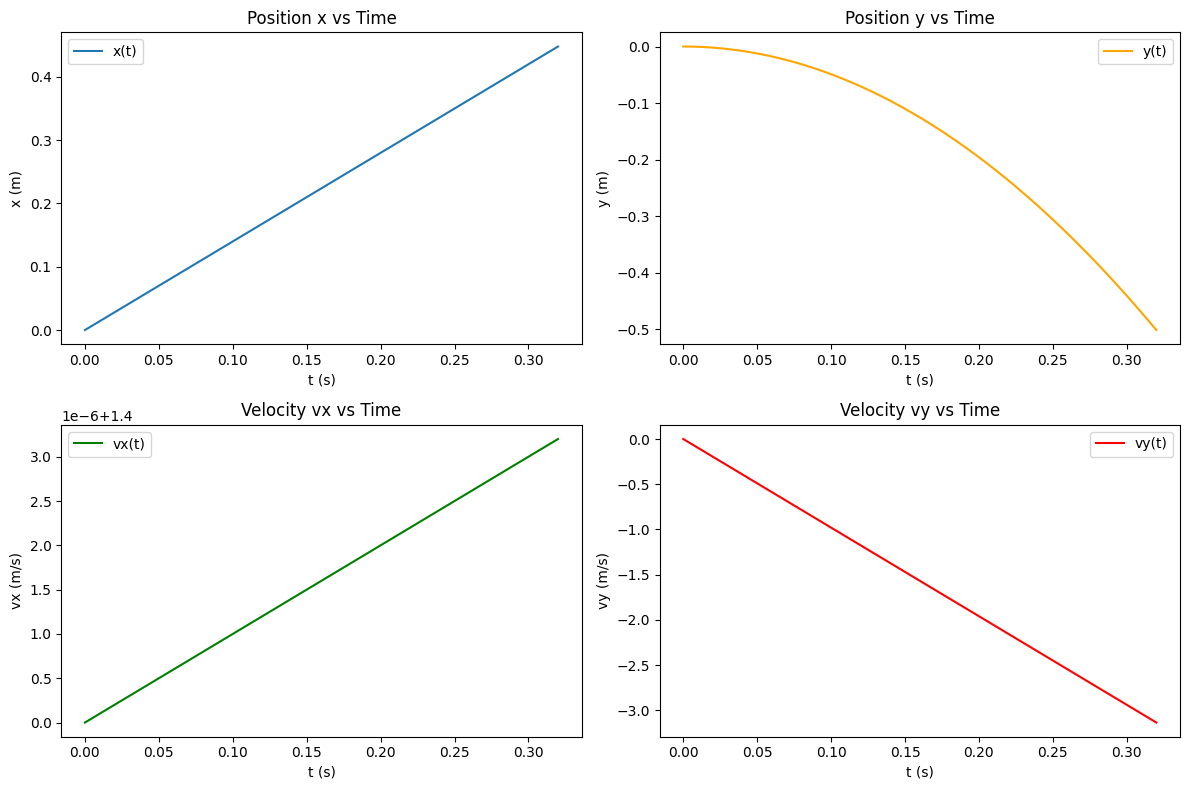

In [8]:
# 3.9
t = sp.symbols('t ')

v = sp.Matrix([1.40 + 0.00001 * t , -9.80 * t])
position = v.integrate(t)
a = v.diff(t)

# print(x.subs(t, 0.320))
print(f"(a) The height of the tabletop above the floor is {-float(position.subs(t, 0.320)[1]):.3g} m.")
print(f"(b) The horizontal distance from the edge of the table is {float(position.subs(t, 0.320)[0]):.3g} m.")
print(f"(c) The x-component of the velocity is {float(v.subs(t, 0.320)[0]):.3g} m/s, and y-component is {float(v.subs(t, 0.320)[1]):.3g} m/s.")
print(f"    The magnitude of the velocity is {float(v.subs(t, 0.320).norm()):.3g} m/s, and its acceleration is {float(sp.atan2(v.subs(t, 0.320)[1],v.subs(t, 0.320)[0])*(180/np.pi)):.2g} degrees.")

print(f"(d) lambdify不能处理常数函数，所以我在变量v添加了一个0.00001 * t，导致vx的图像不是水平的，但注意到y轴的单位是：1.4*10^(-6)")
v_func = sp.lambdify(t, v, 'numpy')
position_func = sp.lambdify(t, position, 'numpy')

t_values = np.linspace(0, 0.320, 400)

v_values = v_func(t_values)
position_values = position_func(t_values)

x_values = position_values[0]
y_values = position_values[1]
vx_values = v_values[0]
vy_values = v_values[1]

# 绘制图像
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t_values, x_values[0], label='x(t)')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.title('Position x vs Time')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_values, y_values[0], label='y(t)', color='orange')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.title('Position y vs Time')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t_values, vx_values[0], label='vx(t)', color='green')
plt.xlabel('t (s)')
plt.ylabel('vx (m/s)')
plt.title('Velocity vx vs Time')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t_values, vy_values[0], label='vy(t)', color='red')
plt.xlabel('t (s)')
plt.ylabel('vy (m/s)')
plt.title('Velocity vy vs Time')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# 3.11
# h = 1/2 * 9.8 * ureg.meter / ureg.second**2 * 3.10 * ureg.second
s = 94.0 * ureg.centimeter / ureg.second * 3.10 * ureg.second
print(f"Milada will hit the ground {s.to(ureg.meter):.3g} from the base of the cliff.")

Milada will hit the ground 2.91 meter from the base of the cliff.


In [10]:
# 3.13 Leaping the River I.
t = np.sqrt(2 * (21.5 - 2.00) * ureg.meter / (9.8 * ureg.meter / ureg.second**2))
# print(t)
v = (57.0 * ureg.meter / t).to(ureg.kilometer / ureg.hour)
# print(v)
print(f"(a) The car should be traveling at {v:.3g} or {v.to(ureg.meter/ureg.second):.3g}.")

v = np.sqrt(v**2+((9.8 * ureg.meter / ureg.second**2)*t)**2)
print(f"(b) The speed of the car just before it lands on the other side is {v.to(ureg.meter/ureg.second):.3g}.")

(a) The car should be traveling at 103 kilometer / hour or 28.6 meter / second.
(b) The speed of the car just before it lands on the other side is 34.6 meter / second.


In [11]:
# 3.15
g_X = 9.8 * ureg.meter / ureg.second**2 / (2.72**2)
print(f"The acceleration due to gravity on Plant X is {g_X:.3g}.")

The acceleration due to gravity on Plant X is 1.32 meter / second ** 2.


In [12]:
# 3.17
t = sp.symbols('t ')

v = sp.Matrix([33*sp.cos(38.5*(np.pi/180)), 33*sp.sin(38.5*(np.pi/180)) - 9.8 * t])
x = v.integrate(t)

sol = sp.solve(sp.Eq(x[1], 10.7), t)
# print(sol)
print(f"(a) At t = {sol[0]:.3g} s and t = {sol[1]:.3g} s.")

# print(v.subs(t, sol[0]))
# print(v.subs(t, sol[1]))
print(f"(b) {v.subs(t, sol[0])[0]:.3g} m/s and {v.subs(t, sol[0])[1]:.3g}m/s.")
print(f"    {v.subs(t, sol[1])[0]:.3g} m/s and {v.subs(t, sol[1])[1]:.3g}m/s.")

sol = sp.solve(sp.Eq(x[1], 0), t)
# print(sol)
v_0 = v.subs(t, sol[1])
print(f"(c) {v_0.norm():.3g} m/s, {np.arctan2(float(v_0[1]),float(v_0[0]))*(180/np.pi):.3g} degrees.")


(a) At t = 0.609 s and t = 3.58 s.
(b) 25.8 m/s and 14.6m/s.
    25.8 m/s and -14.6m/s.
(c) 33.0 m/s, -38.5 degrees.


In [13]:
# 3.19
t = sp.symbols('t ')

v = sp.Matrix([12.0 * sp.cos(51*(np.pi/180)), 12.0 * sp.sin(51*(np.pi/180)) - 9.8 * t])
x = v.integrate(t)
a = v.diff(t)
print(f"(a) The x-component of a is {float(a[0]):.3g} m/s^2, and y-component is {float(a[1]):.3g} m/s^2.")
print(f"(b) The x-component of v at the beginning is {float(v.subs(t, 0)[0]):.3g} m/s, and y-component is {float(v.subs(t, 0)[1]):.3g} m/s.")
print(f"    The x-component of v at the end is {float(v.subs(t, 2.08)[0]):.3g} m/s, and y-component is {float(v.subs(t, 2.08)[1]):.3g} m/s.")
print(f"(c) She threw the shot {float(x[0].subs(t, 2.08)):.3g} meters horizontally.")
print(f"(d) Pass.")
print(f"(e) The shot was {-x.subs(t,2.08)[1]:.3g} meters above the ground when she released it.")
print(f"(f) Pass.")

(a) The x-component of a is 0 m/s^2, and y-component is -9.8 m/s^2.
(b) The x-component of v at the beginning is 7.55 m/s, and y-component is 9.33 m/s.
    The x-component of v at the end is 7.55 m/s, and y-component is -11.1 m/s.
(c) She threw the shot 15.7 meters horizontally.
(d) Pass.
(e) The shot was 1.80 meters above the ground when she released it.
(f) Pass.


(a) The maximum height is 13.6 m.
(b) The speed is 34.6 m/s.
(c) The horizontal distance is 103 m.


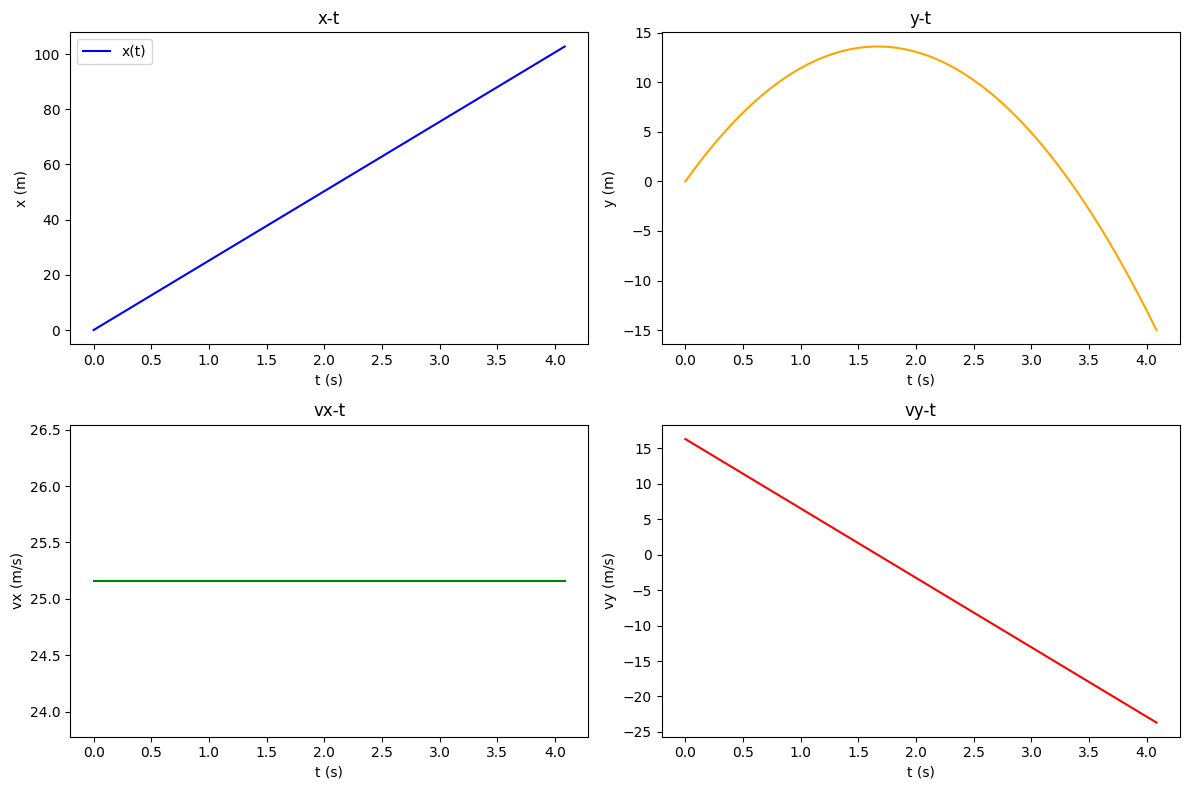

In [14]:
# 3.21
t = sp.symbols('t ')

v_exp = sp.Matrix([30.0*sp.cos(33.0*(np.pi/180)), 30.0*sp.sin(33.0*(np.pi/180)) - 9.8*t])
x_exp = v_exp.integrate(t)
a_exp = v_exp.diff(t)

v_func = sp.lambdify(t, v_exp, 'numpy')
x_func = sp.lambdify(t, x_exp, 'numpy')
a_func = sp.lambdify(t, a_exp, 'numpy')

sol = sp.solve(sp.Eq(v_exp[1], 0), t)
h_max = x_func(sol[0])[1][0]
print(f"(a) The maximum height is {h_max:.3g} m.")

sol = sp.solve(sp.Eq(x_exp[1], -15.0), t)
speed_ground = v_exp.subs(t, sol[1]).norm()
print(f"(b) The speed is {speed_ground:.3g} m/s.")

x_horizon = x_exp.subs(t, sol[1])[0]
print(f"(c) The horizontal distance is {x_horizon:.3g} m.")

t_values = np.linspace(0, float(sol[1]), 400)

x_values = x_func(t_values)[0][0]
y_values = x_func(t_values)[1][0]

vx_values = np.zeros_like(t_values, dtype=float)
vy_values = np.zeros_like(t_values, dtype=float)
for i in range(len(t_values)):
    vx_values[i] = v_func(t_values[i])[0][0]  # 提取 x_func 返回值的第一个元素
    vy_values[i] = v_func(t_values[i])[1][0]  # 提取 x_func 返回值的第二个元素

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t_values, x_values, label='x(t)', color='blue')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.title('x-t')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_values, y_values, label='y(t)', color='orange')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.title('y-t')

plt.subplot(2, 2, 3)
plt.plot(t_values, vx_values, label='vx(t)', color='green')
plt.xlabel('t (s)')
plt.ylabel('vx (m/s)')
plt.title('vx-t')

plt.subplot(2, 2, 4)
plt.plot(t_values, vy_values, label='vy(t)', color='red')
plt.xlabel('t (s)')
plt.ylabel('vy (m/s)')
plt.title('vy-t')

plt.tight_layout()
plt.show()

In [15]:
# 3.23
# Pass.

In [16]:
# 3.25
r = 6380 * ureg.kilometer
T = 24 * ureg.hour
w = 2*np.pi / T
a = w**2 * r

print(f"(a) The radial acceleration is {a.to(ureg.meter/ureg.second**2):.2g} or {(a.to(ureg.meter/ureg.second**2) / 9.8).magnitude:.2g}g.")

t = (2 * np.pi * np.sqrt(r / (9.8*ureg.meter/ureg.second**2))).to(ureg.hour)
print(f"(b) The period of the Earth's rotation would have to be {t:.2g} for this to occur.")

(a) The radial acceleration is 0.034 meter / second ** 2 or 0.0034g.
(b) The period of the Earth's rotation would have to be 1.4 hour for this to occur.


In [17]:
# 3.27
r = 0.800 * ureg.meter * np.sin(37 * (np.pi/180))
T = 0.600 * ureg.second
w = 2 * np.pi / T
a = w**2 * r

print(f"The magnitude of the radial acceleration of the ball is {a.to(ureg.meter/ureg.second**2):.3g}.")

The magnitude of the radial acceleration of the ball is 52.8 meter / second ** 2.


In [18]:
# 3.29 Pilot Blackout in a Power Dive.
a = 9.8 * 5.5 * ureg.meter / ureg.second**2
r = 280 * ureg.meter
v = (a * r)**(1/2)
print(f"The minimum speed of the pilot is {v.to(ureg.meter/ureg.second):.3g} or {v.to(ureg.kilometer/ureg.hour):.3g}.")

The minimum speed of the pilot is 123 meter / second or 442 kilometer / hour.


In [19]:
# 3.31
t = sp.symbols('t ')
r = 14.0 * ureg.meter
v = 7.13 * ureg.meter / ureg.second
w = v / r
T = (2*np.pi / w).to(ureg.second)

a = (v**2 / r).to(ureg.meter / ureg.second**2)
print(f"(a) {a:.3g}, 指向圆心、垂直于地面向上。")

print(f"(b) {a:.3g}, 指向圆心、垂直于地面向下。")

print(f"(c) T = {T:.3g}.")

(a) 3.63 meter / second ** 2, 指向圆心、垂直于地面向上。
(b) 3.63 meter / second ** 2, 指向圆心、垂直于地面向下。
(c) T = 12.3 second.


In [20]:
# 3.33 Hypergravity.
r = 18.00 * ureg.meter
a = 9 * 9.8 * ureg.meter / ureg.second**2
w = (a/r)**(1/2)
print(f"(a) {(w*r):.3g} or {(w*r).to(ureg.kilometer/ureg.hour):.3g}")

r_feet = r - 1.40 * ureg.meter
a_feet = w**2 * r_feet
print(f"(b) The Different is {a-a_feet:.3g}.")

T = 2*np.pi / (v/r)
f = 1 / T
print(f"(c) {f.to(1 / ureg.minute):.3g}.")
######################################################

(a) 39.8 meter / second or 143 kilometer / hour
(b) The Different is 6.86 meter / second ** 2.
(c) 3.78 / minute.


In [21]:
# 3.35
print(f"(a) {32.0/(1.7+1.4):.3g}s.")
print(f"(b) {32.0/(1.7-1.4):.3g}s.")

(a) 10.3s.
(b) 107s.


In [22]:
# 3.37
v = np.array([0.41 * np.cos(-np.pi/4), 0.41 * np.sin(-np.pi/4)]) - np.array([0.60, 0])
print(f"{np.linalg.norm(v):.2f}m/s, {np.arctan2(v[1],v[0])*(180/np.pi):.2f} degrees.")

0.42m/s, -136.93 degrees.


In [23]:
# 3.39 Bird Migration.
print(f"(a) 60 degrees.")
print(f"(b) {550/(100*np.sin(np.pi/3)):.2g} hours.")

(a) 60 degrees.
(b) 6.4 hours.


In [24]:
# 3.41 Crossing the River I.
print(f"(a) {np.sqrt(4.2**2+2.0**2):.2g} m/s and {np.arctan2(-2.0,4.2)*(180/np.pi):.2g} degrees.")
print(f"(b) {500/4.2:.2g} s.")
print(f"(c) {2*(500/4.2):.2g} m.")
######################################################

(a) 4.7 m/s and -25 degrees.
(b) 1.2e+02 s.
(c) 2.4e+02 m.


In [25]:
# 3.43
# Pass.

# Problems

In [26]:
# 3.45 CALC
print(f"When t = 2b / (3c).")

When t = 2b / (3c).


In [27]:
# 3.47 CP
t = sp.symbols('t')
t_off = (2*200/1.48)**(1/2)
a = sp.Piecewise(
    (sp.Matrix([1.48 * sp.cos(35 * (np.pi/180)), 1.48 * sp.sin(35 * (np.pi/180))]), t <= t_off),
    (sp.Matrix([0, -9.8]), t > t_off)
)
v = a.integrate(t)
r = v.integrate(t)

sol = sp.solve(sp.Eq(v.args[1][0][1], 0), t)
print(f"(a) The maximum height is {r.subs(t, sol[0])[1]:.3g}m.")

# print(r.args[1][0][1])
sol_b = sp.solve(sp.Eq(r.args[1][0][1], 0), t)
print(f"(b) The rocket's greatest horizontal range beyond point A is {r.subs(t, sol_b[1])[0]:.3g}m.")

(a) The maximum height is 125m.
(b) The rocket's greatest horizontal range beyond point A is 293m.


In [28]:
# 3.49
t = (2*90.0/9.8)**(1/2)
s = 62.0 * t
print(f"{s:.3g}m.")

266m.


In [29]:
# 3.51
t = sp.symbols('t ')

v = sp.Matrix([0, -15.0, 10.0 - 9.8 * t])
r = v.integrate(t) + sp.Matrix([0, 0, 30])
a = v.diff(t)

sol = sp.solve(sp.Eq(r[2], 0), t)
print(f"(a) r = {r.subs(t, sol[1])}, 应该放置在跳落点南方{-r.subs(t, sol[1])[1]:.3g}米处。")
print(f"(b) 画图累，Pass.")

(a) r = Matrix([[0], [-55.4537052508286], [0]]), 应该放置在跳落点南方55.5米处。
(b) 画图累，Pass.


In [30]:
# 3.53 CP CALC
t = sp.symbols('t')
v = sp.Matrix([15.0 + 1.60 * t, -9.8 * t])
r = v.integrate(t) + sp.Matrix([0, 39.0])

sol = sp.solve(sp.Eq(r[1], 0), t)
print(f"{r.subs(t, sol[1])[0]:.3g}m.")

48.7m.


In [31]:
# 3.55
t, v = sp.symbols('t v ')

a_exp = sp.Matrix([0, -9.8])
v_exp = a_exp.integrate(t) + sp.Matrix([v * sp.cos(np.pi/3), v * sp.sin(np.pi/3)])
r_exp = v_exp.integrate(t)

eq1 = sp.Eq(r_exp[0], 18.0)
eq2 = sp.Eq(r_exp[1], 8.00)
sol = sp.solve((eq1, eq2), (t, v))

print(f"(a) The magnitude of the ball's initial velocity is {sol[1][1]:.3g} m/s.")
v_strik = v_exp.subs({t:sol[1][0], v:sol[1][1]})
print(f"{v_strik.norm():.3g}m/s, {np.arctan2(float(v_strik[1]),float(v_strik[0]))*(180/np.pi):.3g} degrees.")

(a) The magnitude of the ball's initial velocity is 16.6 m/s.
10.8m/s, -40.1 degrees.


In [32]:
# 3.57
t, v = sp.symbols('t v ')
angle = 53 * (np.pi/180)

a_exp = sp.Matrix([0, -9.8])
v_exp = a_exp.integrate(t) + sp.Matrix([v * sp.cos(angle), v * sp.sin(angle)])
r_exp = v_exp.integrate(t)

eq1 = sp.Eq(v_exp[1], 0)
eq2 = sp.Eq(r_exp[1], 6.74 * 10**(-2))
sol = sp.solve((eq1, eq2), (t, v))
print(f"(a) The initial speed is {sol[1][1]:.3g} m/s.")

v_exp = v_exp.subs(v, sol[1][1])
r_exp = v_exp.integrate(t)
sol = sp.solve(sp.Eq(r_exp[0], 1.06), t)

print(f"(b) The hight of the cliff is {-r_exp.subs(t, sol[0])[1]:.3g} m.")

(a) The initial speed is 1.44 m/s.
(b) The hight of the cliff is 5.93 m.


In [33]:
# 3.59
# H, t, v0, an = sp.symbols('H t v0 an')
# a_exp = sp.Matrix([0, -9.8])
# v_exp = a_exp.integrate(t) + sp.Matrix([v0 * sp.cos(an), v0 * sp.sin(an)])
# r_exp = v_exp.integrate(t) + sp.Matrix([0, H])

# sol = sp.solve(sp.Eq(r_exp.subs(an, 90*(np.pi/180))[1], 0), t)
# sol[1]
# print(f"{v_exp.subs(an, 90*(np.pi/180)).subs(t, sol[1]).norm()}")

# 这道题应当直接用分析的方式解决。
# v_t**2 - v_0**2 = 2 * a * (x_t - x_0) # 用这个公式

# Pass.

In [34]:
# 3.61 Look Out!
t = sp.symbols('t ')
angle = -40 * (np.pi/180)

a_exp = sp.Matrix([0, -9.8])
v_exp = a_exp.integrate(t) + sp.Matrix([7.00 * sp.cos(angle) , 7.00 * sp.sin(angle)])
r_exp = v_exp.integrate(t) + sp.Matrix([0, 14.0])

eq = sp.Eq(r_exp[1], 0)
sol = sp.solve(eq, t)
print(f"(a) The distance is {r_exp.subs(t, sol[1])[0]:.3g} m.")

eq = sp.Eq(r_exp[0], 4.0)
sol = sp.solve(eq, t)
print(f"(c) {r_exp.subs(t, sol[0])[1]:.2g} m. (打不到，会越过这个人的头顶。)")

(a) The distance is 6.93 m.
(c) 7.9 m. (打不到，会越过这个人的头顶。)


In [35]:
# 3.63 Leaping the River II.
t, v = sp.symbols('t v ')
angle = 53 * (np.pi/180)

a_exp = sp.Matrix([0, -9.8])
v_exp = a_exp.integrate(t) + sp.Matrix([v * sp.cos(angle) , v * sp.sin(angle)])
r_exp = v_exp.integrate(t)

eq1 = sp.Eq(r_exp[1], -15.0)
eq2 = sp.Eq(r_exp[0], 40.0)
sol = sp.solve((eq1, eq2), (t, v))
print(f"(a) It should have been {sol[1][1]:.3g} m/s.")

v_exp = v_exp.subs(v, sol[1][1]/2)
r_exp = v_exp.integrate(t)

eq1 = sp.Eq(r_exp[0], 40)
eq2 = sp.Eq(r_exp[1], -100)
sol = sp.solve(eq2, t)
print(f"(b) He laned at {r_exp.subs(t, sol[1])[0]:.3g} m form the edge of the ramp.")

(a) It should have been 17.8 m/s.
(b) He laned at 28.4 m form the edge of the ramp.


In [36]:
# 3.65
t, v = sp.symbols('t v ')

a_exp = sp.Matrix([0, -9.8])
v_exp = a_exp.integrate(t) + sp.Matrix([v, 0])
r_exp = v_exp.integrate(t)

eq1 = sp.Eq(r_exp, sp.Matrix([100, -20]))
sol = sp.solve(eq1, (t,v))
print(f"(a) The minimum speed is {sol[1][1]:.3g} m/s.")

v_exp = v_exp.subs(v, sol[1][1])
r_exp = v_exp.integrate(t)

sol_2 = sp.solve(sp.Eq(r_exp[1], -45), t)
print(f"(b) The distance is {r_exp.subs(t, sol_2[1])[0]-100:.2g} m.")

(a) The minimum speed is 49.5 m/s.
(b) The distance is 50 m.


In [37]:
# 3.67
t = 50.0*ureg.meter/(8.00*ureg.meter/ureg.second)
print(f"{t.to(ureg.second):.3g}.")

6.25 second.


In [38]:
# 3.69
t, v = sp.symbols('t v ')
angle = 56 * np.pi / 180

a_exp = sp.Matrix([0, -9.8])
v_exp = a_exp.integrate(t) + sp.Matrix([v * sp.cos(angle) , v * sp.sin(angle)])
r_exp = v_exp.integrate(t) + sp.Matrix([0, 1.60])

eq1 = sp.Eq(r_exp, sp.Matrix([14.0, 5.00]))
sol = sp.solve(eq1, (t, v))
print(f"(a) The minimum speed is {sol[1][1]:.3g} m/s.")

sol_2 = sp.solve(sp.Eq(r_exp.subs(v, sol[1][1])[1], 0), t)
print(f"(b) The distance is {r_exp.subs({t:sol_2[1], v:sol[1][1]})[0]-14.0:.3g} m.")

(a) The minimum speed is 13.3 m/s.
(b) The distance is 3.76 m.


In [39]:
# 3.71
a, b = sp.symbols('a b ')

t = 0.470
v_airplane_exp = sp.Matrix([-214, 0])
v_wind_exp = sp.Matrix([a, b])
r_resultant = sp.Matrix([-123, -12])

eq = sp.Eq((v_airplane_exp + v_wind_exp)*t, r_resultant)
sol = sp.solve(eq, (a,b))
v_wind_exp = v_wind_exp.subs(sol)
print(f"(a) The magnitude of the wind velocity is {v_wind_exp.norm():.3g} km/h and the direction is {np.arctan2(float(v_wind_exp[1]),float(v_wind_exp[0]))*(180/np.pi):.3g} degrees.")

print(f"(b) 西偏北{np.arcsin(40/214)*(180/np.pi):.3g}度。")

(a) The magnitude of the wind velocity is 54.1 km/h and the direction is -152 degrees.
(b) 西偏北10.8度。


In [40]:
# 3.73
v_Juan_to_ground = np.array([0, 7.30])
v_ball_to_ground = np.array([13.3 * np.cos(59.4*np.pi/180), 13.3 * np.sin(59.4*np.pi/180)])
v_ball_to_Juan = v_ball_to_ground - v_Juan_to_ground
print(f"The magnitude of the ball's velocity relative to Juan is {np.linalg.norm(v_ball_to_Juan):.3g} m/s.")
print(f"The direction is {np.arctan2(v_ball_to_Juan[1],v_ball_to_Juan[0])*(180/np.pi):.3g} degrees.")

The magnitude of the ball's velocity relative to Juan is 7.94 m/s.
The direction is 31.5 degrees.


In [41]:
# 3.75
v_Mia_to_ground = np.array([0, 6.30])
v_ball_to_Mia = np.array([6.80 * np.cos(-np.pi/3), 6.80 * np.sin(-np.pi/3)])
v_ball_to_ground = v_ball_to_Mia + v_Mia_to_ground
print(f"The magnitude of the ball's velocity relative to ground is {np.linalg.norm(v_ball_to_ground):.3g} m/s.")
print(f"The direction is {np.arctan2(v_ball_to_ground[1],v_ball_to_ground[0])*(180/np.pi):.3g} degrees.")

The magnitude of the ball's velocity relative to ground is 3.42 m/s.
The direction is 6.89 degrees.


(a) 拟合函数: R^2 = 55.20356164383562h + -20.250821917808118


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

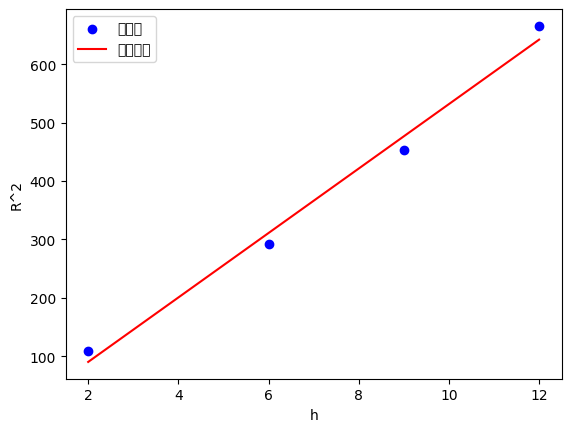

(b) The average value of v_0 is 16.4 m/s.
(c) The range is 23.9 m.


In [42]:
# 3.77 DATA
h_values = np.array([2.00, 6.00, 9.00, 12.00])
R_values = np.array([10.4, 17.1, 21.3, 25.8])
R_squared_values = R_values**2

# From chatGPT
coefficients = np.polyfit(h_values, R_squared_values, 1)
a, b = coefficients

print(f"(a) 拟合函数: R^2 = {a}h + {b}")

# 绘制数据点和拟合直线
plt.scatter(h_values, R_squared_values, color='blue', label='数据点')
plt.plot(h_values, a * h_values + b, color='red', label='拟合直线')
plt.xlabel('h')
plt.ylabel('R^2')
plt.legend()
plt.show()

v = (a/2*9.8)**(1/2)
print(f"(b) The average value of v_0 is {v:.3g} m/s.")

print(f"(c) The range is {v*np.cos(np.pi/6)*2*v*np.sin(np.pi/6)/9.8:.3g} m.")

# Challenge Problems

In [43]:
# 3.79 CALC
# t, rad, v_0 = sp.symbols('t rad v_0 ', positive=True)

# a_exp = sp.Matrix([0, -9.8])
# v_exp = a_exp.integrate(t) + sp.Matrix([v_0 * sp.cos(rad), v_0 * sp.sin(rad)])
# r_exp = v_exp.integrate(t)
# r_norm = r_exp.norm()
# r_norm_diff = r_norm.diff(t)
# print(r_norm_diff)

# 不适合用计算机解题，草稿纸上分析更好。Pass。

In [104]:
# 3.81 CP
# t = sp.symbols('t', positive=True)
# t_lowest = sp.symbols('t_lowest', positive=True)

# a_airliner_exp = sp.Matrix([0, -9.8])
# v_airliner_exp = a_airliner_exp.integrate(t) + sp.Matrix([850, 0])
# r_airliner_exp = v_airliner_exp.integrate(t)

# a_rocket_exp = sp.Piecewise(
#     (sp.Matrix([0, -9.8]), 0 < t <= t_lowest),
#     (sp.Matrix([9.8*3*sp.cos(np.pi/6), 9.8*3*sp.sin(np.pi/6)]), t>t_lowest)
# )
# v_rocket_exp = a_rocket_exp.integrate(t)
# v_rocket_exp = sp.Piecewise(
#     *((expr + sp.Matrix([850, 0]), cond) for expr, cond in v_rocket_exp.args)
# )
# r_rocket_exp = v_rocket_exp.integrate(t)

# eq1 = sp.Eq(r_airliner_exp + sp.Matrix([1.00, 0]), r_rocket_exp.args[1][0])
# sol = sp.solve(eq1, (t, t_lowest))

t_1, t_2 = sp.symbols('t_1 t_2 ', positive=True)

g = 9.80
eq1 = sp.Eq(1/2*g*t_1**2, -g*t_1*t_2 + 1/2*(3*g*sp.sin(np.pi/6)*t_2**2))
eq2 = sp.Eq(1000, 1/2*(3*g*sp.cos(np.pi/6))*t_2**2) # eq2 正确
sol = sp.solve((eq1,eq2),(t_1,t_2))
print(f"整个过程分为两个时间段：( 0 < t <= t_1 ) 和 ( t_1 < t <= t_1 + t_2 )。")
print(f"t_1 = {sol[0][0]:.3g}s, t_2 = {sol[0][1]:.3g}s.")
print(f"The minimum time that the rocket must fall before its engine starts is {sol[0][0]:.3g}s.")
t_1 = sol[0][0]
t_2 = sol[0][1]

# t = sp.symbols('t', positive=True)

# a_airliner_exp = sp.Matrix([0, -9.8])
# v_airliner_exp = a_airliner_exp.integrate(t) + sp.Matrix([850, 0]) # 850的单位没换
# r_airliner_exp = v_airliner_exp.integrate(t)

# a_rocket_exp = sp.Piecewise(
#     (sp.Matrix([0, -9.8]), 0 < t <= t_1),
#     (sp.Matrix([9.8*3*sp.cos(np.pi/6), 9.8*3*sp.sin(np.pi/6)]), t_1 < t)
# )
# v_rocket_exp = a_rocket_exp.integrate(t)
# v_rocket_exp = sp.Piecewise(
#     *((expr + sp.Matrix([850, 0]), cond) for expr, cond in v_rocket_exp.args)
# )
# r_rocket_exp = v_rocket_exp.integrate(t)

整个过程分为两个时间段：( 0 < t <= t_1 ) 和 ( t_1 < t <= t_1 + t_2 )。
t_1 = 5.15s, t_2 = 8.86s.
The minimum time that the rocket must fall before its engine starts is 5.15s.


In [ ]:
# 3.83
# 3.85
# Pass.